#### Assignment 2: Computer Vision 2

#### Imports

In [26]:
import numpy as np
import pandas as pd
from packaging import version

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as k

In [27]:
def create_results_dataframe(model_name,training_history,y_true,y_pred):

    training_df = pd.DataFrame(training_history.history)
    model_results_df = pd.DataFrame(training_df.iloc[-1,:]).transpose()
    model_results_df = model_results_df.reset_index().rename(columns={'index':'epoch'})
    model_results_df['model'] = model_name
    model_results_df = model_results_df.iloc[:,[-1,0,1,2]]
    model_results_df['precision_micro'] = precision_score(y_true,y_pred,average='micro')
    model_results_df['recall_micro'] = recall_score(y_true,y_pred,average='micro')
    model_results_df['f1_score_micro'] = f1_score(y_true,y_pred,average='micro')

    return(model_results_df)

#### EDA Functions

In [28]:
def get_three_classes(x, y):
    def indices_of(class_id):
        indices, _ = np.where(y == float(class_id))
        return indices

    indices = np.concatenate([indices_of(0), indices_of(1), indices_of(2)], axis=0)

    x = x[indices]
    y = y[indices]

    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)

    x = x[indices]
    y = y[indices]

    y = tf.keras.utils.to_categorical(y)

    return x, y

In [29]:
def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace=False)

    x = x[indices]
    y = y[indices]
    p = p[indices]

    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names_preview[np.argmax(p[i])], color=col)
    plt.show()

#### Research Functions

In [4]:
def plot_history(history):
  losses = history.history['loss']
  accs = history.history['accuracy']
  val_losses = history.history['val_loss']
  val_accs = history.history['val_accuracy']
  epochs = len(losses)

  plt.figure(figsize=(16, 4))
  for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
  plt.show()

def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])

In [5]:
def print_validation_report(y_test, predictions):
    print("Classification Report")
    print(classification_report(y_test, predictions))
    print('Accuracy Score: {}'.format(accuracy_score(y_test, predictions)))
    print('Root Mean Square Error: {}'.format(np.sqrt(MSE(y_test, predictions))))

In [6]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(16,12))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

#### Model and Performance Functions

In [7]:
def compile_train_model(model, x_train, y_train, x_valid, y_valid, epochs=200):
  timestamp=int(time.time())

  # Compile
  model.compile(optimizer='rmsprop',
                loss = 'SparseCategoricalCrossentropy',
                metrics=['accuracy'])

  # Train
  start_time = time.time()
  history = model.fit(
    x_train,
    y_train,
    epochs=epochs,
    batch_size=512,
    validation_data=(x_valid, y_valid),
    #verbose=0,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint("CNN_model.h5",save_best_only=True,save_weights_only=False)
        ,tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
        ]
  )
  end_time = time.time()
  second_elapsed = round(end_time - start_time)

  print(f'Finished model training in {second_elapsed}s')

  print('Model performance with training set')
  model.evaluate(x_train, y_train)

  print('Evaluating model performance with validation set')
  model.evaluate(x_valid, y_valid)

  return history, model

In [8]:
def plot_history(history):
  losses = history.history['loss']
  accs = history.history['accuracy']
  val_losses = history.history['val_loss']
  val_accs = history.history['val_accuracy']
  epochs = len(losses)

  plt.figure(figsize=(16, 4))
  for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
  plt.show()

def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])

In [9]:
def print_validation_report(y_test, predictions):
    print("Classification Report")
    print(classification_report(y_test, predictions))
    print('Accuracy Score: {}'.format(accuracy_score(y_test, predictions)))
    print('Root Mean Square Error: {}'.format(np.sqrt(MSE(y_test, predictions))))

In [10]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(16,12))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

#### Import the CIFAR-10 Data Set

In [11]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [12]:
(train_images, train_labels),(test_images, test_labels)= tf.keras.datasets.cifar10.load_data()

In [13]:
x_preview, y_preview = get_three_classes(train_images, train_labels)
x_preview, y_preview = get_three_classes(test_images, test_labels)

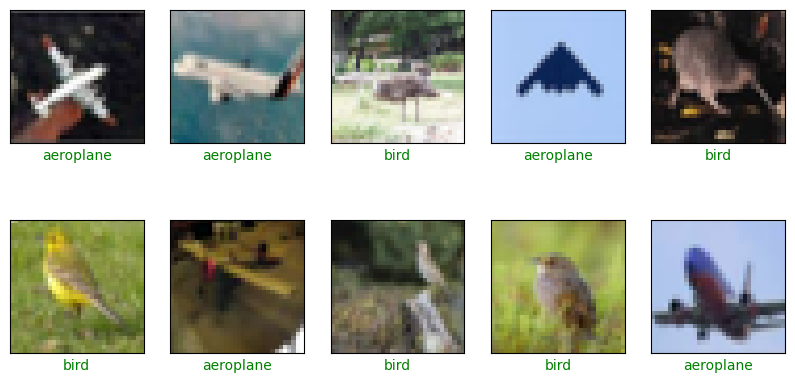

In [14]:
class_names_preview = ['aeroplane', 'car', 'bird']

show_random_examples(x_preview, y_preview, y_preview)

#### Pre-Processing

In [15]:
# Create validation set
x_train_split, x_valid_split, y_train_split, y_valid_split = train_test_split(x_train
                                                                              ,y_train
                                                                              ,test_size=.1
                                                                              ,random_state=42
                                                                              ,shuffle=True)

In [16]:
# Rescale
x_train_norm = x_train_split/255
x_valid_norm = x_valid_split/255
x_test_norm = x_test/255

#### Experiment 1 - Dense Neural Network, 2 Layers, No Regularaziation

In [37]:
model_one = Sequential([
  Flatten(input_shape=x_train_norm.shape[1:]),
  Dense(units=384,activation=tf.nn.relu),
  Dense(units=768,activation=tf.nn.relu),
  Dense(units=10, activation=tf.nn.softmax)       
])

model_one.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

training_one = model_one.fit(x_train_norm
                    ,y_train_split
                    ,epochs=200
                    ,batch_size=64
                    ,verbose=0
                    ,validation_data=(x_valid_norm, y_valid_split)
                    ,callbacks=[
                     tf.keras.callbacks.ModelCheckpoint("model_one.h5",save_best_only=True,save_weights_only=False) 
                     ,tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]                                                                                                       
                   )

model_one = tf.keras.models.load_model("model_one.h5")

pred_one = model_one.predict(x_test_norm)

pred_one = np.argmax(pred_one, axis=1)

/Users/dylanhayashi/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 0s 923us/step


#### Experiment 2 - Dense Neural Network, 3 Layers, No Regularization

In [38]:
model_two = Sequential([
  Flatten(input_shape=x_train_norm.shape[1:]),
  Dense(units=384,activation=tf.nn.relu),
  Dense(units=768,activation=tf.nn.relu),
  Dense(units=10, activation=tf.nn.softmax)       
])

model_two.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

training_two = model_two.fit(x_train_norm
                    ,y_train_split
                    ,epochs=200
                    ,batch_size=64
                    ,verbose=0
                    ,validation_data=(x_valid_norm, y_valid_split)
                    ,callbacks=[
                     tf.keras.callbacks.ModelCheckpoint("model_two.h5",save_best_only=True,save_weights_only=False) 
                     ,tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]                                                                                                       
                   )

model_two = tf.keras.models.load_model("model_two.h5")

pred_two = model_two.predict(x_test_norm)

pred_two = np.argmax(pred_two, axis=1)

313/313 [==============================] - 0s 1ms/step


#### Experiment 3 - Convolutional Neural Network, 2 Convolutional & Max Pooling Layers, No Regularization

In [39]:
model_three = Sequential([
  Flatten(input_shape=x_train_norm.shape[1:]),
  Dense(units=384,activation=tf.nn.relu),
  Dense(units=768,activation=tf.nn.relu),
  Dense(units=10, activation=tf.nn.softmax)       
])

model_three.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

training_three = model_three.fit(x_train_norm
                    ,y_train_split
                    ,epochs=200
                    ,batch_size=64
                    ,verbose=0
                    ,validation_data=(x_valid_norm, y_valid_split)
                    ,callbacks=[
                     tf.keras.callbacks.ModelCheckpoint("model_three.h5",save_best_only=True,save_weights_only=False) 
                     ,tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]                                                                                                       
                   )

model_three = tf.keras.models.load_model("model_three.h5")

pred_three = model_three.predict(x_test_norm)

pred_three = np.argmax(pred_three, axis=1)

/Users/dylanhayashi/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 0s 986us/step


#### Experiment 4 - Convolutional Neural Network, 3 Convolutional & Max Pooling Layers, No Regularization

In [40]:
model_four = Sequential([
  Flatten(input_shape=x_train_norm.shape[1:]),
  Dense(units=384,activation=tf.nn.relu),
  Dense(units=768,activation=tf.nn.relu),
  Dense(units=10, activation=tf.nn.softmax)       
])

model_four.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

training_four = model_four.fit(x_train_norm
                    ,y_train_split
                    ,epochs=200
                    ,batch_size=64
                    ,verbose=0
                    ,validation_data=(x_valid_norm, y_valid_split)
                    ,callbacks=[
                     tf.keras.callbacks.ModelCheckpoint("model_four.h5",save_best_only=True,save_weights_only=False) 
                     ,tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]                                                                                                       
                   )

model_four = tf.keras.models.load_model("model_four.h5")

pred_four = model_four.predict(x_test_norm)

pred_four = np.argmax(pred_four, axis=1)

/Users/dylanhayashi/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 0s 991us/step


#### Experiment 5

In [50]:
model_five = Sequential([
  Flatten(input_shape=x_train_norm.shape[1:]),
  Dense(units=384,activation=tf.nn.relu),
  Dense(units=768,activation=tf.nn.relu),
  Dense(units=10, activation=tf.nn.softmax)       
])

model_five.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

training_five = model_five.fit(x_train_norm
                    ,y_train_split
                    ,epochs=200
                    ,batch_size=64
                    ,verbose=0
                    ,validation_data=(x_valid_norm, y_valid_split)
                    ,callbacks=[
                     tf.keras.callbacks.ModelCheckpoint("model_five.h5",save_best_only=True,save_weights_only=False) 
                     ,tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]                                                                                                       
                   )

model_five = tf.keras.models.load_model("model_five.h5")

pred_five = model_five.predict(x_test_norm)

pred_five = np.argmax(pred_five, axis=1)

313/313 [==============================] - 0s 835us/step


#### Experiment 6

In [49]:
model_six = Sequential([
  Flatten(input_shape=x_train_norm.shape[1:]),
  Dense(units=384,activation=tf.nn.relu),
  Dense(units=768,activation=tf.nn.relu),
  Dense(units=10, activation=tf.nn.softmax)       
])

model_six.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

training_six = model_six.fit(x_train_norm
                    ,y_train_split
                    ,epochs=200
                    ,batch_size=64
                    ,verbose=0
                    ,validation_data=(x_valid_norm, y_valid_split)
                    ,callbacks=[
                     tf.keras.callbacks.ModelCheckpoint("model_six.h5",save_best_only=True,save_weights_only=False) 
                     ,tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]                                                                                                       
                   )

model_six = tf.keras.models.load_model("model_six.h5")

pred_six = model_six.predict(x_test_norm)

pred_six = np.argmax(pred_six, axis=1)

/Users/dylanhayashi/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 0s 872us/step


#### Experiment 7

In [43]:
model_seven = Sequential([
  Flatten(input_shape=x_train_norm.shape[1:]),
  Dense(units=384,activation=tf.nn.relu),
  Dense(units=768,activation=tf.nn.relu),
  Dense(units=10, activation=tf.nn.softmax)       
])

model_seven.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

training_seven = model_seven.fit(x_train_norm
                    ,y_train_split
                    ,epochs=200
                    ,batch_size=64
                    ,verbose=0
                    ,validation_data=(x_valid_norm, y_valid_split)
                    ,callbacks=[
                     tf.keras.callbacks.ModelCheckpoint("model_seven.h5",save_best_only=True,save_weights_only=False) 
                     ,tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]                                                                                                       
                   )

model_seven = tf.keras.models.load_model("model_seven.h5")

pred_seven = model_seven.predict(x_test_norm)

pred_seven = np.argmax(pred_seven, axis=1)

313/313 [==============================] - 0s 1ms/step


#### Experiment 8

In [44]:
model_eight = Sequential([
  Flatten(input_shape=x_train_norm.shape[1:]),
  Dense(units=384,activation=tf.nn.relu),
  Dense(units=768,activation=tf.nn.relu),
  Dense(units=10, activation=tf.nn.softmax)       
])

model_eight.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

training_eight = model_eight.fit(x_train_norm
                    ,y_train_split
                    ,epochs=200
                    ,batch_size=64
                    ,verbose=0
                    ,validation_data=(x_valid_norm, y_valid_split)
                    ,callbacks=[
                     tf.keras.callbacks.ModelCheckpoint("model_eight.h5",save_best_only=True,save_weights_only=False) 
                     ,tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]                                                                                                       
                   )

model_eight = tf.keras.models.load_model("model_eight.h5")

pred_eight = model_eight.predict(x_test_norm)

pred_eight = np.argmax(pred_eight, axis=1)

313/313 [==============================] - 0s 923us/step


#### Experiment 9

In [45]:
model_nine = Sequential([
  Flatten(input_shape=x_train_norm.shape[1:]),
  Dense(units=384,activation=tf.nn.relu),
  Dense(units=768,activation=tf.nn.relu),
  Dense(units=10, activation=tf.nn.softmax)       
])

model_nine.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

training_nine = model_nine.fit(x_train_norm
                    ,y_train_split
                    ,epochs=200
                    ,batch_size=64
                    ,verbose=0
                    ,validation_data=(x_valid_norm, y_valid_split)
                    ,callbacks=[
                     tf.keras.callbacks.ModelCheckpoint("model_nine.h5",save_best_only=True,save_weights_only=False) 
                     ,tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]                                                                                                       
                   )

model_nine = tf.keras.models.load_model("model_nine.h5")

pred_nine = model_nine.predict(x_test_norm)

pred_nine = np.argmax(pred_nine, axis=1)

313/313 [==============================] - 0s 836us/step


#### Experiment 10

In [46]:
model_ten = Sequential([
  Flatten(input_shape=x_train_norm.shape[1:]),
  Dense(units=384,activation=tf.nn.relu),
  Dense(units=768,activation=tf.nn.relu),
  Dense(units=10, activation=tf.nn.softmax)       
])

model_ten.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

training_ten = model_ten.fit(x_train_norm
                    ,y_train_split
                    ,epochs=200
                    ,batch_size=64
                    ,verbose=0
                    ,validation_data=(x_valid_norm, y_valid_split)
                    ,callbacks=[
                     tf.keras.callbacks.ModelCheckpoint("model_ten.h5",save_best_only=True,save_weights_only=False) 
                     ,tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]                                                                                                       
                   )

model_ten = tf.keras.models.load_model("model_ten.h5")

pred_ten = model_ten.predict(x_test_norm)

pred_ten = np.argmax(pred_ten, axis=1)

313/313 [==============================] - 0s 880us/step


#### Results

In [48]:
experiment_results = pd.DataFrame(columns=['model','epoch','accuracy','loss','precision_micro','recall_micro','f1_score_micro'])

experiment_1_results = create_results_dataframe('model_one',training_one,y_test,pred_one)
experiment_2_results = create_results_dataframe('model_two',training_two,y_test,pred_two)
experiment_3_results = create_results_dataframe('model_three',training_three,y_test,pred_three)
experiment_4_results = create_results_dataframe('model_four',training_four,y_test,pred_four)
experiment_5_results = create_results_dataframe('model_five',training_five,y_test,pred_five)
experiment_6_results = create_results_dataframe('model_six',training_six,y_test,pred_six)
experiment_7_results = create_results_dataframe('model_seven',training_seven,y_test,pred_seven)
experiment_8_results = create_results_dataframe('model_eight',training_eight,y_test,pred_eight)
experiment_9_results = create_results_dataframe('model_nine',training_nine,y_test,pred_nine)
experiment_10_results = create_results_dataframe('model_ten',training_ten,y_test,pred_ten)


experiment_results = pd.concat([
    experiment_results,
    experiment_1_results,
    experiment_2_results,
    experiment_3_results,
    experiment_4_results,
    experiment_5_results,
    experiment_6_results,
    experiment_7_results,
    experiment_8_results,
    experiment_9_results,
    experiment_10_results,
    ]).reset_index(drop=True)
    
experiment_results

,model,epoch,accuracy,loss,precision_micro,recall_micro,f1_score_micro
0,model_one,5,0.477644,1.460503,0.4576,0.4576,0.4576
1,model_two,13,0.552556,1.249869,0.4943,0.4943,0.4943
2,model_three,6,0.478533,1.453834,0.4736,0.4736,0.4736
3,model_four,5,0.484578,1.446051,0.4676,0.4676,0.4676
4,model_five,4,0.466956,1.495672,0.4533,0.4533,0.4533
5,model_six,10,0.516689,1.350900,0.4842,0.4842,0.4842
6,model_seven,15,0.545133,1.267755,0.4823,0.4823,0.4823
7,model_eight,13,0.529622,1.316504,0.4879,0.4879,0.4879
8,model_nine,6,0.488533,1.431188,0.4570,0.4570,0.4570
9,model_ten,10,0.509444,1.363044,0.4801,0.4801,0.4801
